In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import copy
import math
import seaborn as sns
%matplotlib inline

### 1. Problem Statement
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 
* You have historical data from previous applicants that you can use as a training set for logistic regression. 
* For each training example, you have the applicant’s scores on two exams and the admissions decision. 
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

### 2. X_train and y_train dataset

In [2]:
X_train = np.array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602, 50.25610789],
       [38.7858038 , 64.99568096],
       [61.37928945, 72.80788731],
       [85.40451939, 57.05198398],
       [52.10797973, 63.12762377],
       [52.04540477, 69.43286012],
       [40.23689374, 71.16774802],
       [54.63510555, 52.21388588],
       [33.91550011, 98.86943574],
       [64.17698887, 80.90806059],
       [74.78925296, 41.57341523],
       [34.18364003, 75.23772034],
       [83.90239366, 56.30804622],
       [51.54772027, 46.85629026],
       [94.44336777, 65.56892161],
       [82.36875376, 40.61825516],
       [51.04775177, 45.82270146],
       [62.22267576, 52.06099195],
       [77.19303493, 70.4582    ],
       [97.77159928, 86.72782233],
       [62.0730638 , 96.76882412],
       [91.5649745 , 88.69629255],
       [79.94481794, 74.16311935],
       [99.27252693, 60.999031  ],
       [90.54671411, 43.39060181],
       [34.52451385, 60.39634246],
       [50.28649612, 49.80453881],
       [49.58667722, 59.80895099],
       [97.64563396, 68.86157272],
       [32.57720017, 95.59854761],
       [74.24869137, 69.82457123],
       [71.79646206, 78.45356225],
       [75.39561147, 85.75993667],
       [35.28611282, 47.02051395],
       [56.2538175 , 39.26147251],
       [30.05882245, 49.59297387],
       [44.66826172, 66.45008615],
       [66.56089447, 41.09209808],
       [40.45755098, 97.53518549],
       [49.07256322, 51.88321182],
       [80.27957401, 92.11606081],
       [66.74671857, 60.99139403],
       [32.72283304, 43.30717306],
       [64.03932042, 78.03168802],
       [72.34649423, 96.22759297],
       [60.45788574, 73.0949981 ],
       [58.84095622, 75.85844831],
       [99.8278578 , 72.36925193],
       [47.26426911, 88.475865  ],
       [50.4581598 , 75.80985953],
       [60.45555629, 42.50840944],
       [82.22666158, 42.71987854],
       [88.91389642, 69.8037889 ],
       [94.83450672, 45.6943068 ],
       [67.31925747, 66.58935318],
       [57.23870632, 59.51428198],
       [80.366756  , 90.9601479 ],
       [68.46852179, 85.5943071 ],
       [42.07545454, 78.844786  ],
       [75.47770201, 90.424539  ],
       [78.63542435, 96.64742717],
       [52.34800399, 60.76950526],
       [94.09433113, 77.15910509],
       [90.44855097, 87.50879176],
       [55.48216114, 35.57070347],
       [74.49269242, 84.84513685],
       [89.84580671, 45.35828361],
       [83.48916274, 48.3802858 ],
       [42.26170081, 87.10385094],
       [99.31500881, 68.77540947],
       [55.34001756, 64.93193801],
       [74.775893  , 89.5298129 ]])

In [3]:
y_train = np.array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
# print( 'The shape of X_train is: ' + str(X_train.shape))
# print( 'The shape of X_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))
#%d = placeholder for numeric values  
#%s = placeholder for string

We have m = 100 training examples


### 3.Visualize your data

c:\users\user\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


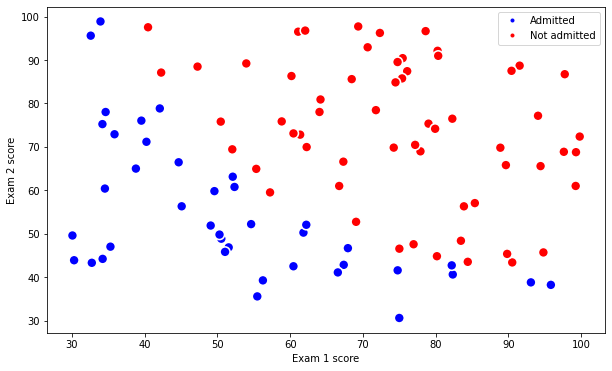

In [5]:
from pylab import *
fig,ax = plt.subplots(1,1,figsize = (10,6))
# palette = colour of dot,  s = dot size
sns.scatterplot(X_train[:,0], X_train[:,1], marker = ".", palette=['blue','red'], hue=y_train,s= 400)

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 

custom = [Line2D([], [], marker='.', color='b', linestyle='None'),
          Line2D([], [], marker='.', color='r', linestyle='None')]
plt.legend(custom, ['Admitted', 'Not admitted'],loc="upper right")
plt.show()

### Part A: Non-Regularized Logistic Regression

### 4.1  Sigmoid function

$g(z) = \frac{1}{1+e^{-z}}$

In [6]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### 4.2 Cost function 

loss function for logistic regression:
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$
* where
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$


*  where m is the number of training examples in the data set and:
$$
\begin{align}
f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)}) \\
g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\\
z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\\
*Therefore:
f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= \frac{1}{1+e^{-(w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b)}}\\
\end{align}
$$




In [7]:
def compute_cost(X, y, w, b, lambda_ = 1):
    total_cost = 0
    m, n = X.shape #100,2
    
    loss_sum = 0 
    for i in range(m):   #100
        
        # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0
        for j in range(n):  #2
            z_wb_ij = X[i,j]*w[j]
            z_wb += z_wb_ij
        z_wb+=b
        f_wb = sigmoid(z_wb)
        loss = - y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
        loss_sum += loss
        
        total_cost = (1 / m) * loss_sum
        
    return total_cost

In [8]:
m , n = X_train.shape

initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost (X_train,y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))


Cost at initial w (zeros): 0.693


### 4.3 Gradient descent

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \
$$

*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label

In [9]:
def compute_gradient(X, y, w, b, lambda_=None):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    
    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb_ij = X[i,j] * w[j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i]) * X[i][j]
            dj_dw[j] += dj_dw_ij
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    
    return dj_db, dj_dw

In [10]:
initial_w = np.zeros(n)
initial_b = 0

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}')
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.0092165893, -11.262842205499998]


### 4.4 Learning parameters using gradient descent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [11]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_) 
        
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        if i<100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
            
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
    return w_in, b_in, J_history, w_history

In [12]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iterations =1000
alpha = 0.00001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)


Iteration    0: Cost     4.70 
Iteration  100: Cost     1.07 
Iteration  200: Cost     0.34 
Iteration  300: Cost     0.31 
Iteration  400: Cost     0.31 
Iteration  500: Cost     0.31 
Iteration  600: Cost     0.31 
Iteration  700: Cost     0.31 
Iteration  800: Cost     0.31 
Iteration  900: Cost     0.31 
Iteration  999: Cost     0.31 


In [74]:
#Write decision boundary
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

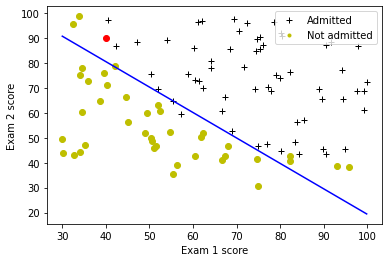

In [76]:
plot_decision_boundary(w, b, X_train, y_train)

custom = [Line2D([], [], marker='+', color='k', linestyle='None'),
          Line2D([], [], marker='.', color='y', linestyle='None')]
plt.legend(custom, ['Admitted', 'Not admitted'],loc="upper right")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 


# Testing new applicant who got exam 1 score = 40, exam 2 score = 90
Testing_X_train = np.array([40])
Testing_y_train = np.array([90])
plt.plot(Testing_X_train,Testing_y_train,'ro')

According to above graph, the data with red plotted right side of decision boundary which can determine new applicant pass the university admission based on their results on two exams.